In [13]:
import numpy as np
from math import sqrt

class Module:
    def sgd_step(): pass
    

class Sequential():
    def __init__(self, modules, loss):
        self.modules = modules
        self.loss = loss
        
    def forward(self, data):
        for layer in self.modules:
            data = layer.forward(data)
        return data
    
    def backward(self, delta):
        for module in self.modules[::-1]:
            delta = module.backward(delta)
    
    def sgd_step(self, lrate):
        for m in self.modules:
            m.sgd_step(lrate)

        

class Linear(Module):
    def __init__(self, in_layers, out_layers):
        self.m = in_layers
        self.n = out_layers
        stdv = 1.0 / sqrt(self.m)
        self.W = np.random.uniform(-stdv, stdv, (self.n, self.m)) # W: (n x m)
        self.W0 = np.random.uniform(-stdv, stdv, (self.n, 1)) # W0: (n x 1)
        self.sgd_defined = True
    
    def forward(self, A): # A is (m x b)
        self.A = A
        # (n x m) . (m x b) + (n x 1) = (n x b)
        return np.dot(self.W, self.A) + self.W0 # return value is (n x b)
    
    def __repr__(self):
        return f'W: {self.W}, W0: {self.W0}, A: {self.A}'
    
    def backward(self, dLdZ): # dLdZ: (n x b)
        self.dLdW = np.dot(dLdZ, self.A.T)  # dLdW: (n x m)
        self.dLdW0 = np.sum(dLdZ, axis=1) # dLdW0: (n x 1)
        return np.dot(self.W.T, dLdZ) # dLd(A_prev): (m x b)
    
    def sgd_step(self, lr):
        self.W = self.W + lr * self.dLdW
        self.W0 = self.W0 + lr * self.dLdW0


class ReLU(Module):

    def __init__(self):
        self.sgd_defined = False

    def forward(self, A):
        self.A = A
        return np.where(A < 0, 0, A)
    
    def backward(self, dLdZ):
        return dLdZ * np.where(self.A < 0, 0, 1)

class Tanh(Module):

    def forward(self, A):
        self.th = np.tanh(A)
        self.sgd_defined = False
        return self.th
    
    def backward(self, dLdZ):
        return dLdZ * (1 - np.square(self.th))

class MSELoss():

    def forward(self, y, ypred):
        self.y = y
        self.ypred = ypred
        return np.mean(np.square(y - ypred), axis=0)
    
    def backward(self):
        return -2 * (self.y - self.ypred)


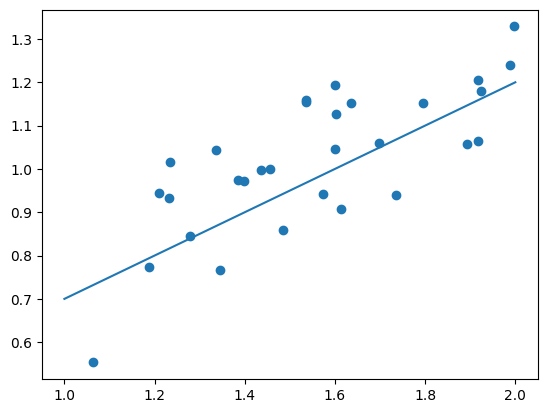

In [14]:
import matplotlib.pyplot as plt

model = Sequential([Linear(1, 1)], MSELoss())

def eqn(x):
    return 0.5 * x + 0.2

X = []
y = []

for i in range(30):
    rand = np.random.uniform(1, 2)
    offset = np.random.uniform(-0.4, 0.4)
    outp = eqn(rand + offset)

    X.append(rand)
    y.append(outp)

X = np.array(X).reshape(-1,1)
y = np.array(y)

plt.scatter(X, y)
x_val = np.linspace(1, 2, 100)
plt.plot(x_val, np.apply_along_axis(eqn, 0, x_val))



In [15]:
num_epochs = 100

for i in range(num_epochs):
    for j in range(20):
        n = np.random.randint(0, X.shape[0])
        predictions = model.forward(X[n:n+1])
        loss = model.loss.forward(y[n:n+1], predictions)
        delta = model.loss.backward()
        model.backward(delta)
        model.sgd_step(0.005)
    if (num_epochs % 10 == 0):
            print(f'loss: {loss}, dLdW: {model.modules[0].dLdW}')
    
    

loss: [17.91408889], dLdW: [[-10.8323331]]
loss: [110.48571359], dLdW: [[-39.77507943]]
loss: [353.61621078], dLdW: [[-60.23537685]]
loss: [1317.90402482], dLdW: [[-114.30833502]]
loss: [5719.15705783], dLdW: [[-289.98214722]]
loss: [14061.38793644], dLdW: [[-331.84038872]]
loss: [51218.33942867], dLdW: [[-558.36493682]]
loss: [221814.79603865], dLdW: [[-1317.98480859]]
loss: [1405230.76401132], dLdW: [[-4559.23344604]]
loss: [5515669.52392423], dLdW: [[-9384.32013525]]
loss: [15683261.32748521], dLdW: [[-12668.54082962]]
loss: [44256139.8690576], dLdW: [[-16413.15825558]]
loss: [1.62464941e+08], dLdW: [[-30303.04164976]]
loss: [8.55624321e+08], dLdW: [[-85141.0485803]]
loss: [2.51413623e+09], dLdW: [[-121245.31904241]]
loss: [1.84324795e+10], dLdW: [[-522167.55721328]]
loss: [4.25098792e+10], dLdW: [[-527678.7185942]]
loss: [1.73435114e+11], dLdW: [[-1113698.98261619]]
loss: [5.07808092e+11], dLdW: [[-1515269.04519837]]
loss: [2.84702057e+12], dLdW: [[-4846709.93151399]]
loss: [9.6934